In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
data = pd.read_csv('Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [126]:
data.shape

(101, 18)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [128]:
data[data['animal name'].duplicated(keep=False)] ## shows Duplicate values

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [129]:
df = data.drop(index=26).reset_index(drop=True)  # reset index    # drop the multiple value of frog
df.drop('animal name',axis=1,inplace=True)

In [130]:
df.shape

(100, 17)

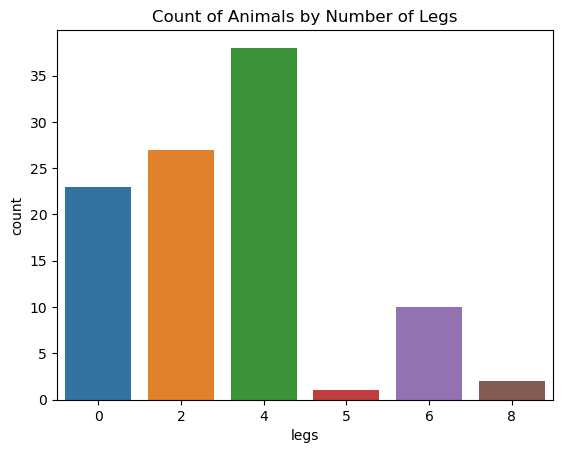

In [131]:
sns.countplot(x='legs', data=data)
plt.title('Count of Animals by Number of Legs')
plt.show()

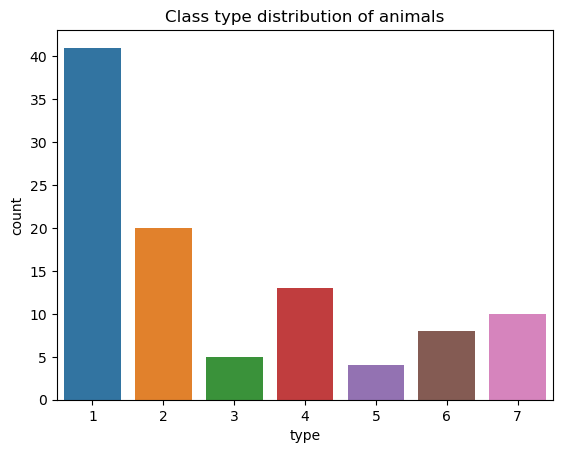

In [142]:
sns.countplot(x='type', data=data)
plt.title('Class type distribution of animals')
plt.show()

# Split the Dataset

In [132]:
# Split the dataset into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split

In [133]:
X = df.iloc[:,0:16]  # features
y = df.iloc[:,-1]   # result

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 16), (80,), (20, 16), (20,))

# K-Nearest Neighbors Algorithm

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [137]:
knn = KNeighborsClassifier(n_neighbors =3)  # create a KNN classifier
knn.fit(X_train, y_train)     # fit the classifier to the training data
y_pred = knn.predict(X_train)   # predict on the test data

In [138]:
confusion_matrix(y_train,y_pred)

array([[31,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  1,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  7]], dtype=int64)

In [139]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        18
           3       1.00      0.50      0.67         4
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7

    accuracy                           0.97        80
   macro avg       0.98      0.93      0.94        80
weighted avg       0.98      0.97      0.97        80



In [140]:
y_pred_test = knn.predict(X_test)
confusion_matrix(y_train,y_pred)
print(classification_report(y_test,y_pred_test,zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.95        20
   macro avg       0.71      0.71      0.71        20
weighted avg       0.95      0.95      0.95        20



### Model is best fit as training accurarcy 0.97 and testing accuracy is  0.95

### In summary, this classification report indicates that the model performs very well overall with high precision and recall for  most classes. Class 3 show a lower recall, which might suggest that it's harder for the model to correctly identify instances of this class compared to others.

### Class 3 poses a significant challenge for the model, as it fails to predict any instances correctly in the testing set. Class 5 was not present in the testing set, hence no predictions were made for it.

In [145]:
from sklearn.model_selection import cross_val_score

Best k: 1


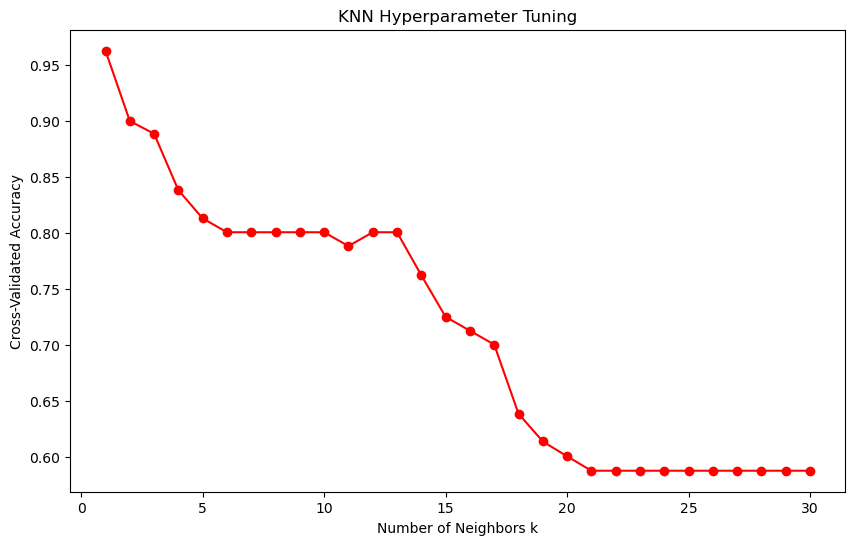

Test accuracy with best k (1): 1.0


In [158]:
k_value = range(1, 31)  # Define range of k value for test
cv_score = []

for k in k_value:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv = 3, scoring='accuracy')
    cv_score.append(score.mean())

# Determine best k value
best = k_value[np.argmax(cv_score)]
print(f'Best k: {best}')


# plot the result
plt.figure(figsize=(10, 6))
plt.plot(k_value, cv_score, marker = 'o', c='red')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()


# Evaluate the model with the best k on the test set
best_knn = KNeighborsClassifier(n_neighbors=best)
best_knn.fit(X_train, y_train)
test_accuracy = best_knn.score(X_train, y_train)
print(f'Test accuracy with best k ({best}): {test_accuracy}')

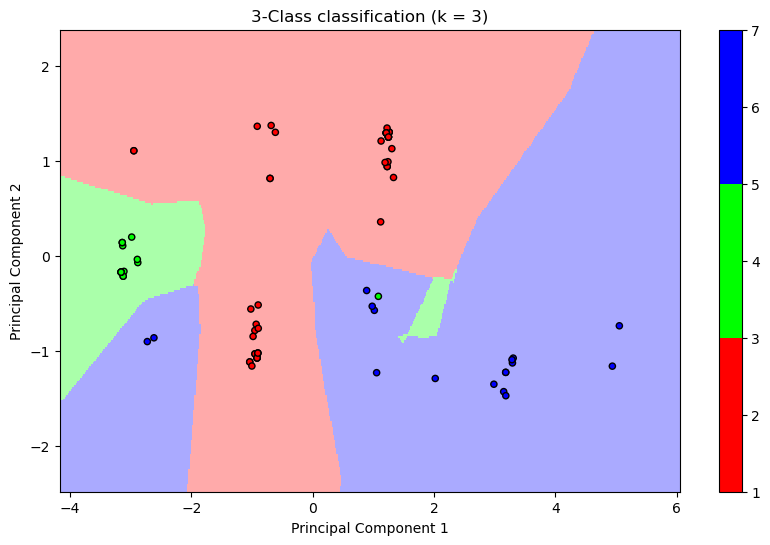

In [159]:
# Perform PCA for dimensionality reduction to 2 components
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xpca_train = pca.fit_transform(X_train)

# Initialize kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xpca_train, y_train)

# Plotting decision regions
h = .02  # step size in the mesh
x_min, x_max = Xpca_train[:, 0].min() - 1, Xpca_train[:, 0].max() + 1
y_min, y_max = Xpca_train[:, 1].min() - 1, Xpca_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicting on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color plot with decision boundaries
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(Xpca_train[:, 0], Xpca_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
plt.colorbar()
plt.title("3-Class classification (k = 3)")
plt.show()